# Sonar Mine Vs Rock Prediction

The task is to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock. Or simply predict metal or rock objects from sonar return data.

# Dataset

Dataset
The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Locating dataset
sonar_df=pd.read_csv('sonar.all-data.csv')

In [6]:
sonar_df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Performing EDA

In [7]:
#to get the first 5 rows
sonar_df.head()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [8]:
#to get the last 5 rows
sonar_df.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [9]:
# to know the statistical values of dataset
sonar_df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
# to know the information of the dataset
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [11]:
# checking for missing values
sonar_df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [13]:
# checking for label column values
sonar_df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [14]:
# to know the mean values of label column
sonar_df.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [15]:
# seperating data and labels.
X=sonar_df.drop('R',axis=1)
Y=sonar_df['R']

In [16]:
print(X)
print(Y)

     0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ...  0.0232  0.0027  0.0065  0.0159  0

In [17]:
# Checking for correlation of dataset
sonar_df.corr()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


# Visualise the data

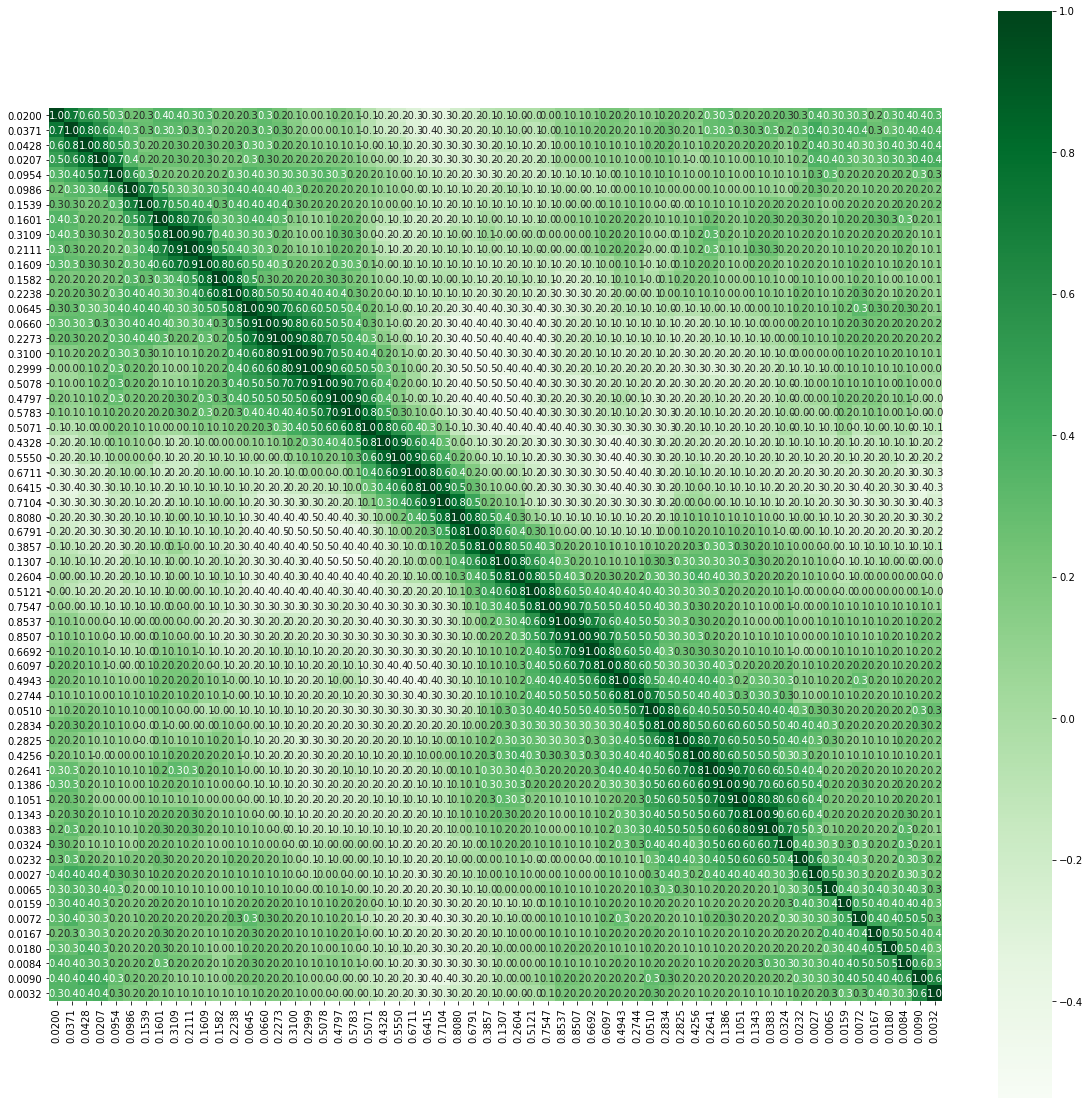

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(sonar_df.corr(),cbar=True,square=True,fmt='.1f',annot=True,cmap='Greens')

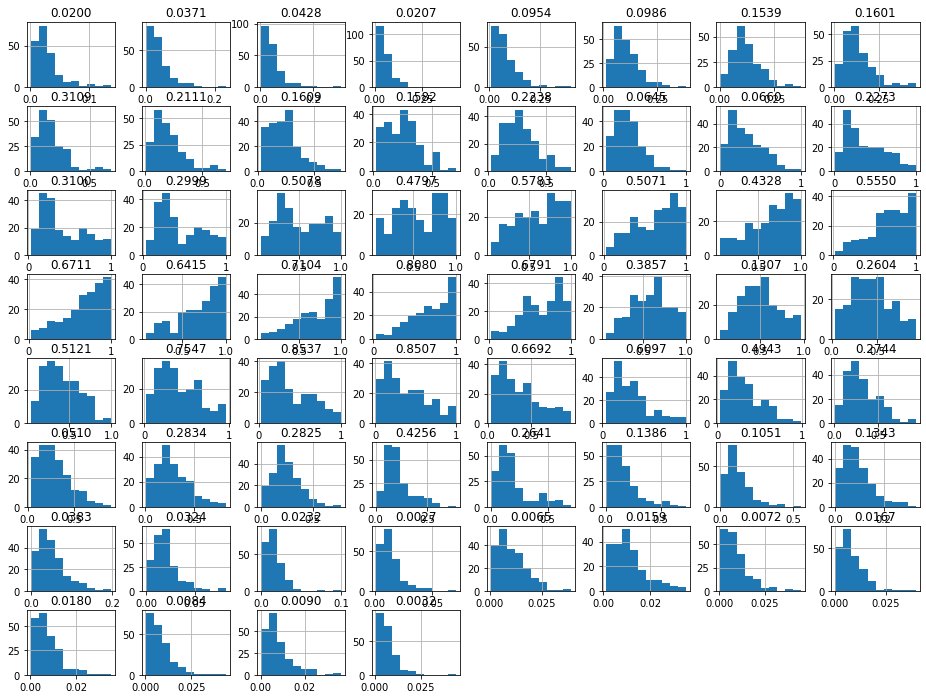

In [23]:
# Histograms
sonar_df.hist(figsize=(16,12));

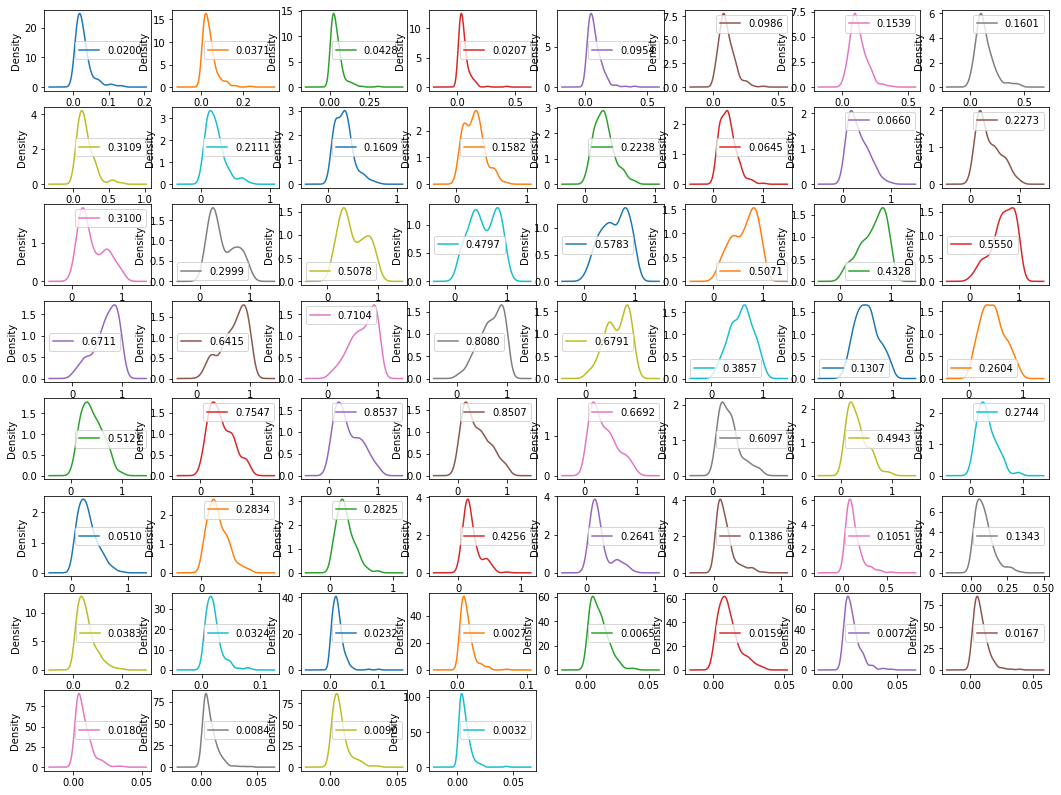

In [24]:
# Density plots
sonar_df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

# Training and Testing Data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(207, 60) (186, 60) (21, 60)


# Model Training

# Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [28]:
#training the LogisticRegression Model with training data
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [29]:
# accuracy on training data.
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [30]:
print('Accuracy on training data:',training_data_accuracy)


Accuracy on training data: 0.8172043010752689


In [31]:
# accuracy on test data.
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [32]:
print('Accuracy on test data:',test_data_accuracy)


Accuracy on test data: 0.8571428571428571


# Making a Predictive System

In [33]:
input_data=(0.0491,0.0279,0.0592,0.127,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,0.0947,0.2497,0.2209,0.3195,0.334,0.3323,0.278,0.2975,0.2948,0.1729,0.3264,0.3834,0.3523,0.541,0.5228,0.4475,0.534,0.5323,0.3907,0.3456,0.4091,0.4639,0.558,0.5727,0.6355,0.7563,0.6903,0.6176,0.5379,0.5622,0.6508,0.4797,0.3736,0.2804,0.1982,0.2438,0.1789,0.1706,0.0762,0.0238,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.014,0.0332,0.0439)

#converting input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshaping the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if(prediction[0]=='R'):
    print('Object is a Rock')
else:
    print('Object is a Mine')

['R']
Object is a Rock


In [34]:
input_data = (0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044)
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
pred = model.predict(input_data_reshape)
if pred[0]=='R':
    print("Object is Rock")
else:
    print("Object is Mine")

Object is Mine
